
# Практическая работа 6 — Разведочный анализ и предобработка данных

**Цель:** освоить методы разведочного анализа (EDA) и предобработки данных.  
**Инструменты:** `pandas`, `numpy`, `matplotlib` (без `seaborn`).

**Датасеты:**
- `application_data.csv` — основной набор данных;
- `normal_exp.csv` — пояснения к колонкам (словарь признаков).

> ⚠️ Вставьте корректные пути к файлам и выполните ноутбук сверху вниз.


In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

from IPython.display import display

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

%matplotlib inline


## 1. Загрузка датасетов

In [38]:

path_app = Path('application_data.csv')  # <-- при необходимости измените
path_dict = Path('normal_exp.xlsx')      # <-- при необходимости измените

df = pd.read_csv(path_app)
print("Форма application_data:", df.shape)

if path_dict.exists():
    dict_df = pd.read_excel(path_dict)
    print("Форма normal_exp:", dict_df.shape)
    display(dict_df.head(10))
else:
    dict_df = None
    print("⚠️ Файл normal_exp.csv не найден — продолжаем без словаря признаков.")

df.head()


Форма application_data: (307511, 122)
Форма normal_exp: (160, 5)


,Column1,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Пропуски: отбросить колонки с >40% отсутствующих значений

In [39]:

missing_share = df.isna().mean().sort_values(ascending=False)
display(missing_share.head(20))

threshold = 0.40
cols_to_drop = missing_share[missing_share > threshold].index.tolist()
print(f"Колонок к удалению (> {int(threshold*100)}% пропусков): {len(cols_to_drop)}")
df = df.drop(columns=cols_to_drop)
print("Новая форма:", df.shape)


COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_AVG             0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_MODE               0.593767
LANDAREA_AVG                0.593767
dtype: float64

Колонок к удалению (> 40% пропусков): 49
Новая форма: (307511, 73)


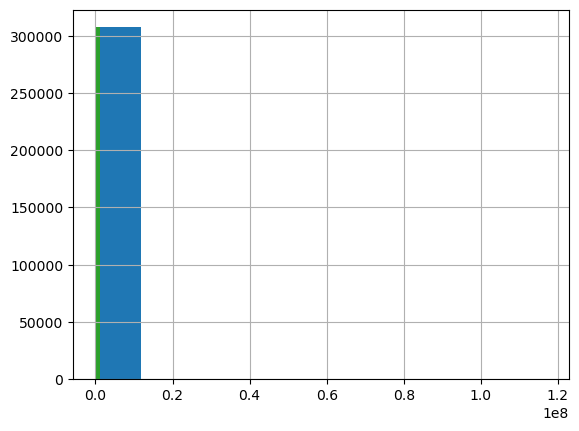

In [66]:
df["AMT_INCOME_TOTAL"].hist(bins=100)
plt.show()

In [67]:
df.AMT_INCOME_TOTAL

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

## 3. Визуализация: гистограммы числовых столбцов и поиск явной аномалии

Числовых колонок: 61


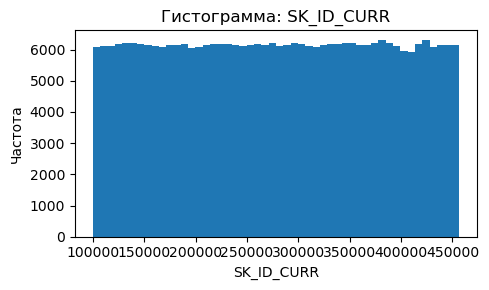

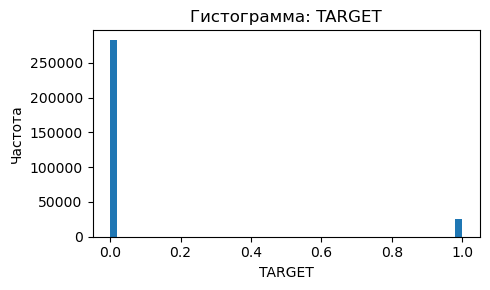

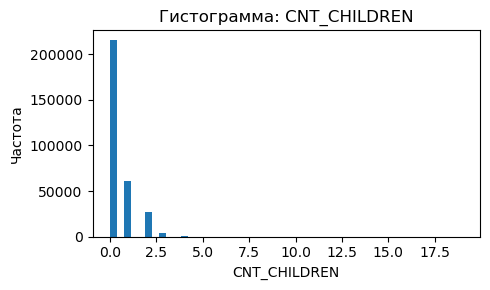

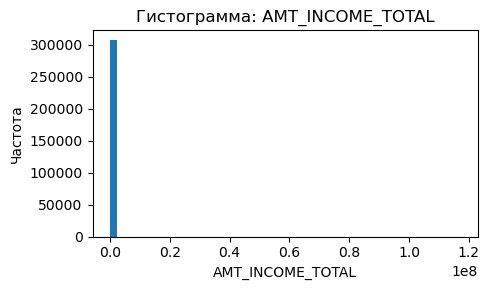

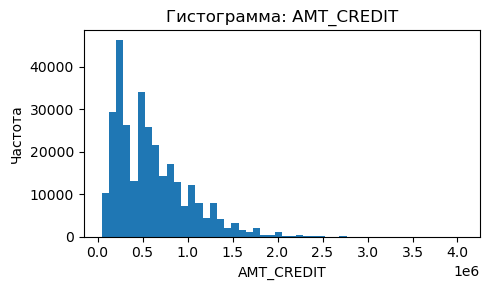

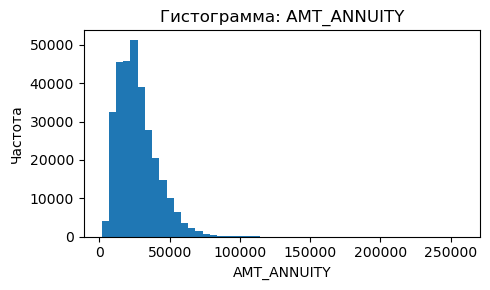

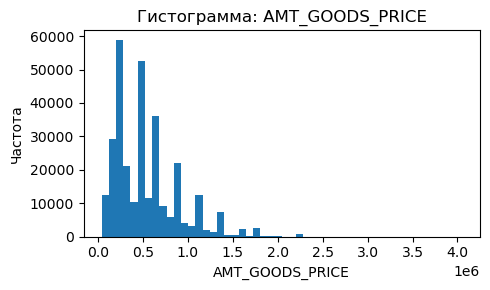

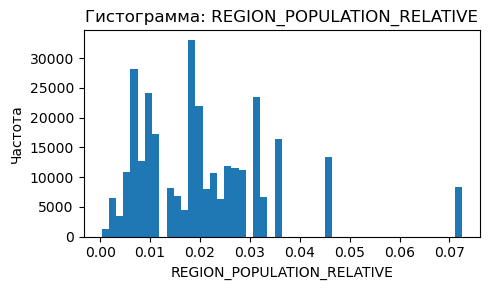

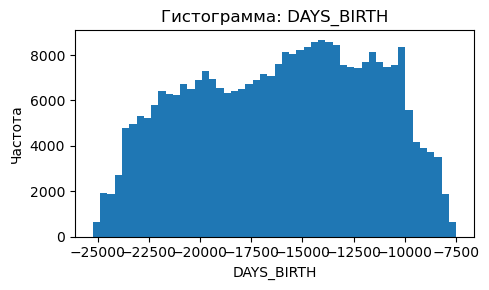

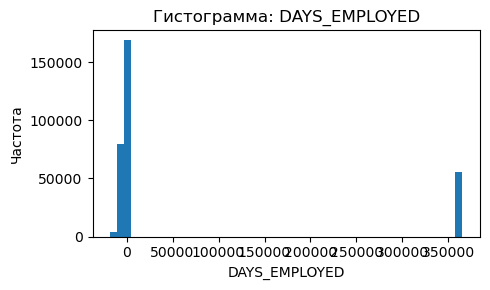

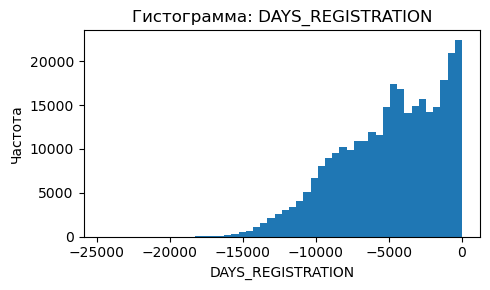

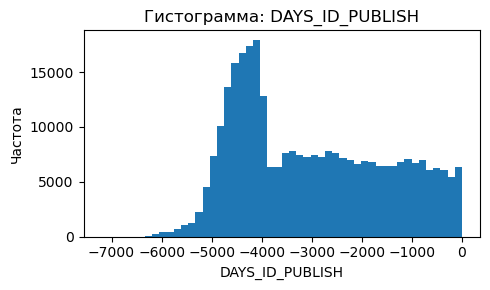

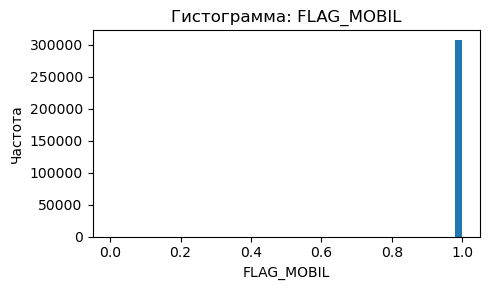

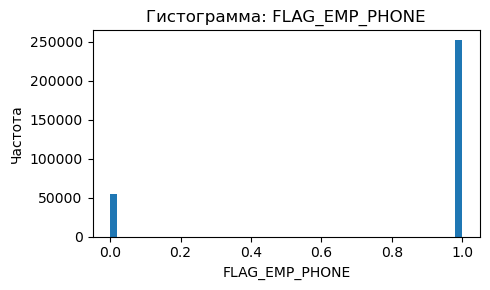

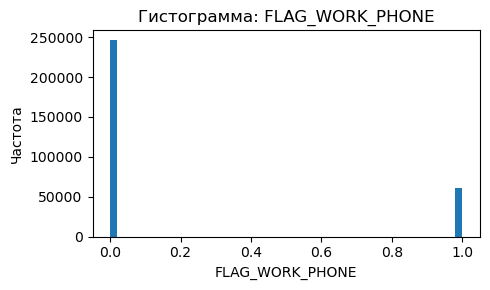

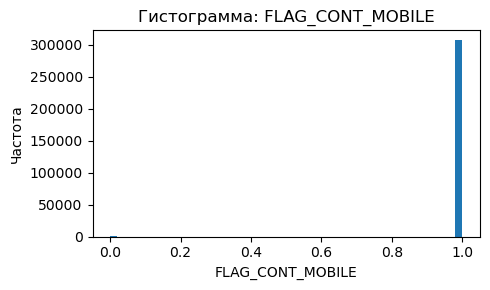

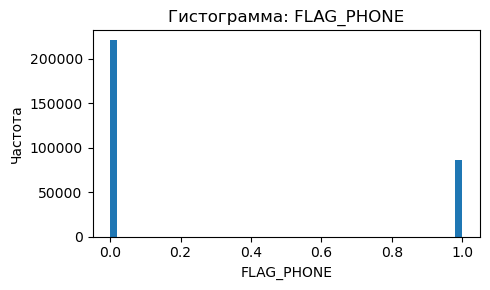

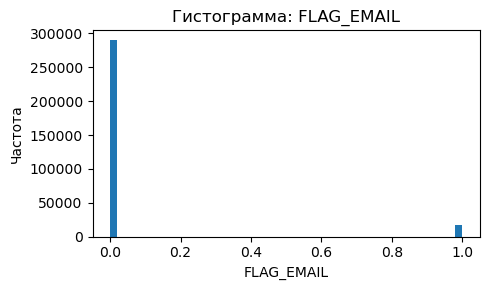

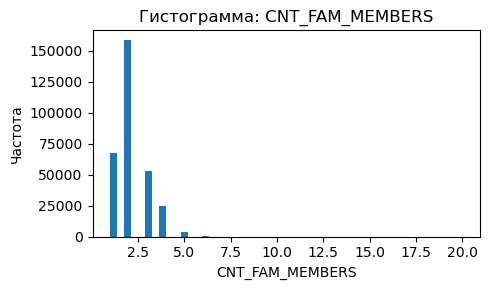

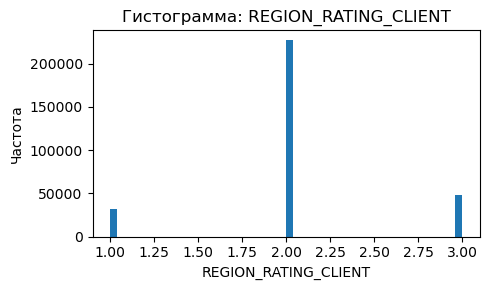

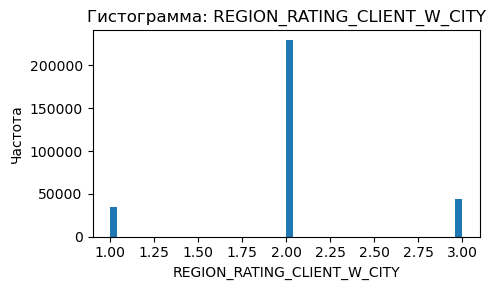

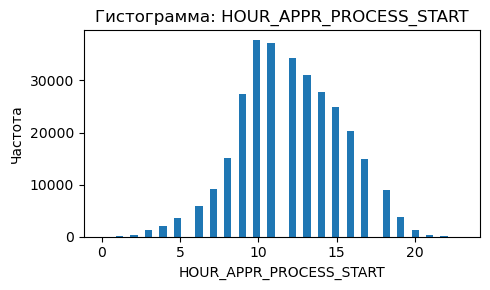

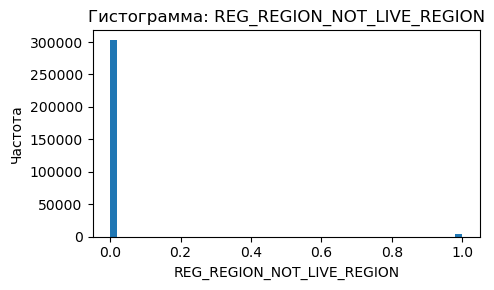

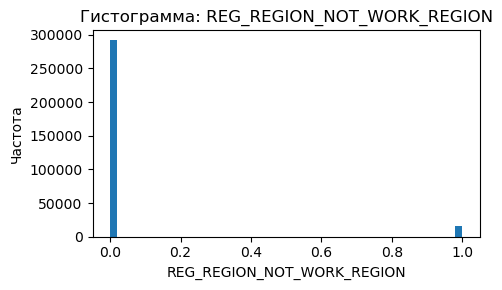

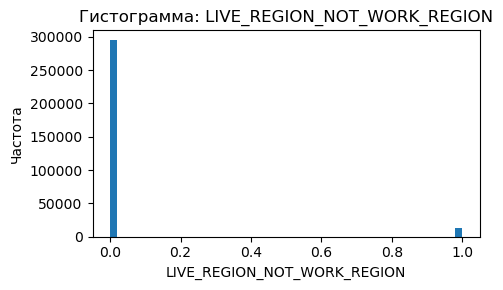

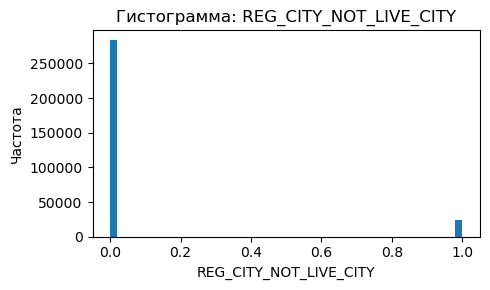

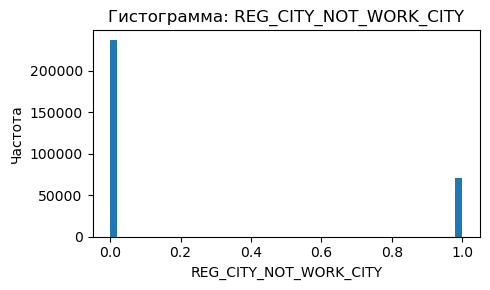

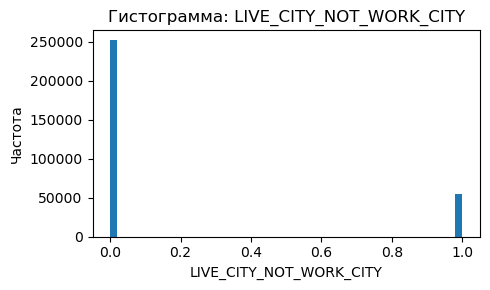

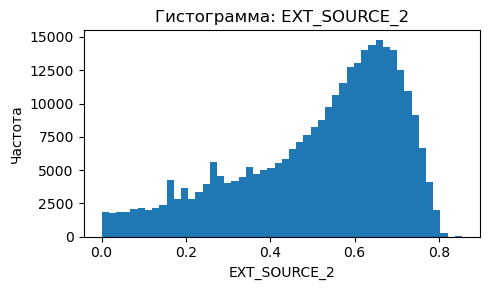

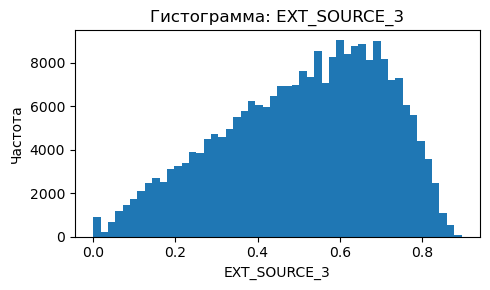

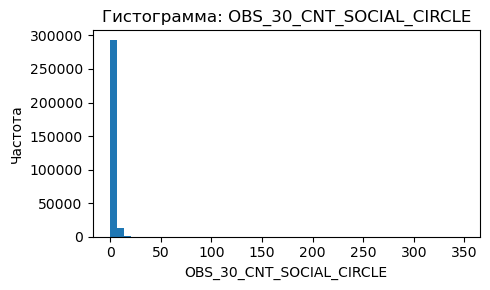

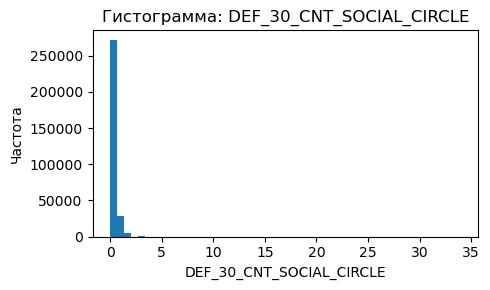

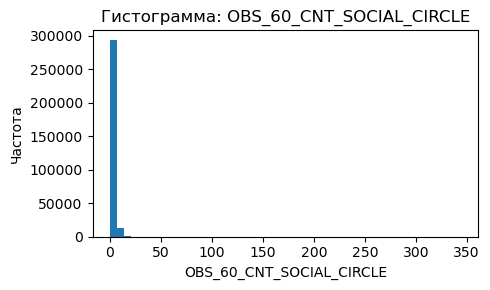

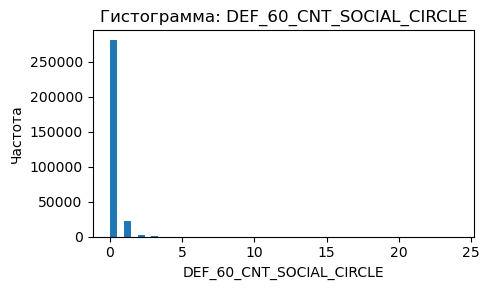

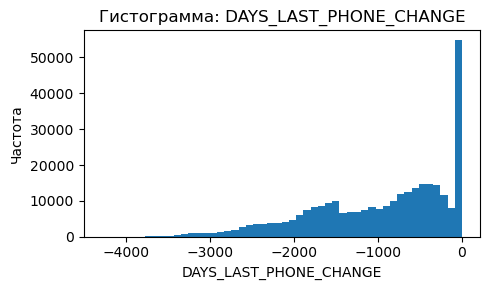

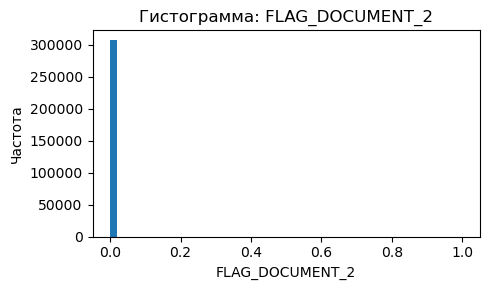

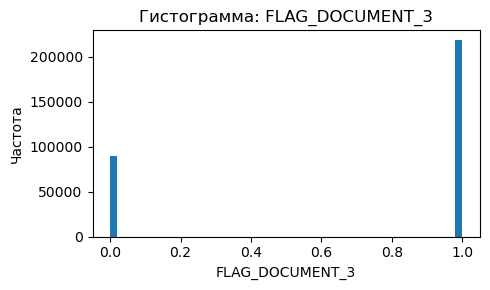

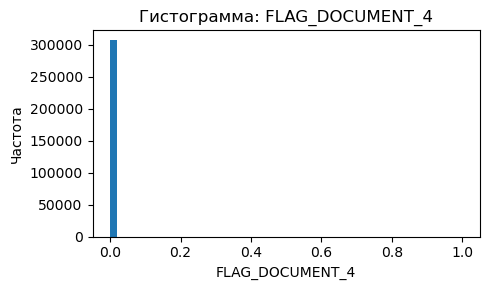

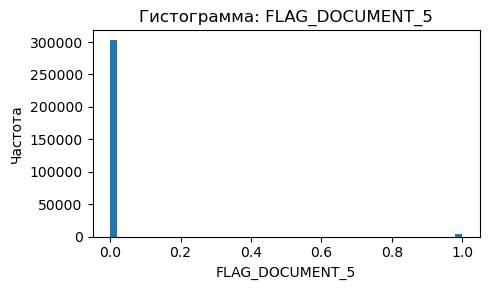

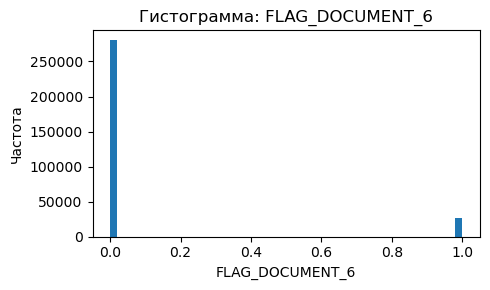

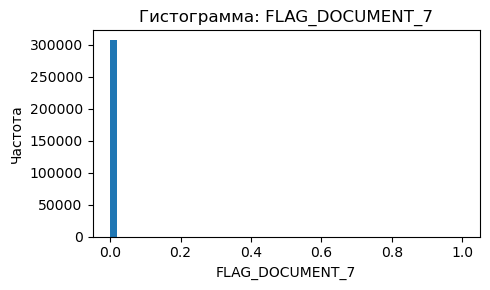

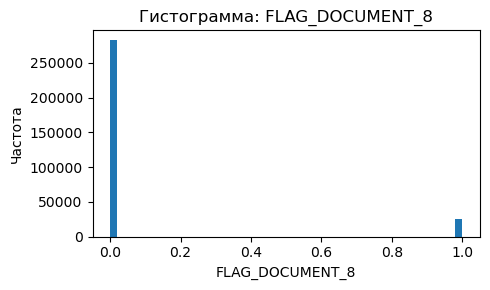

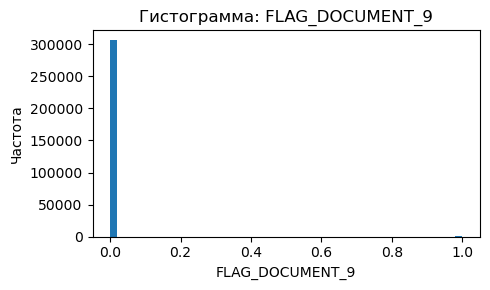

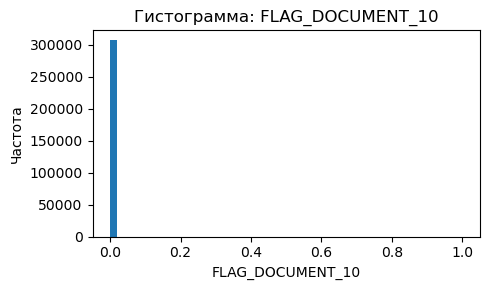

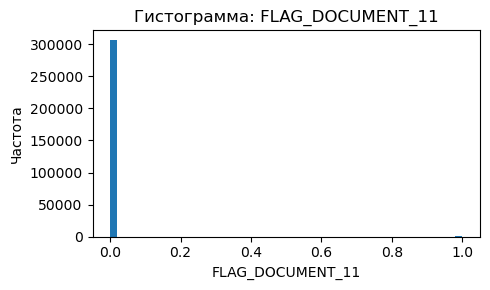

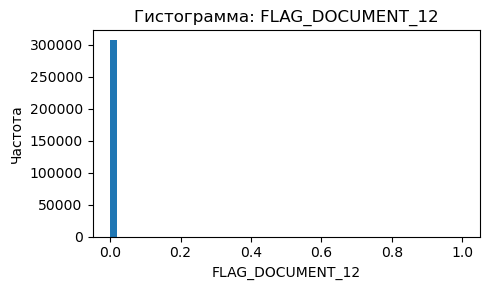

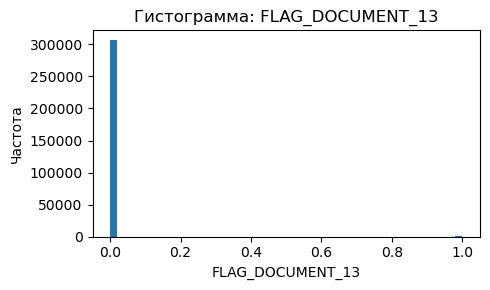

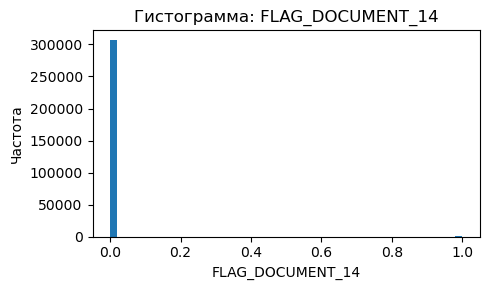

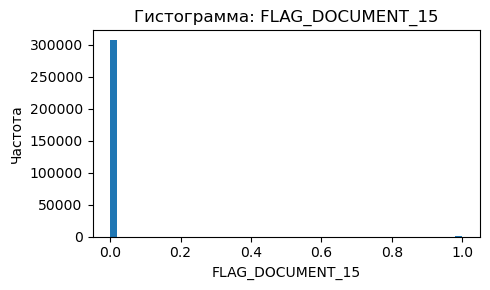

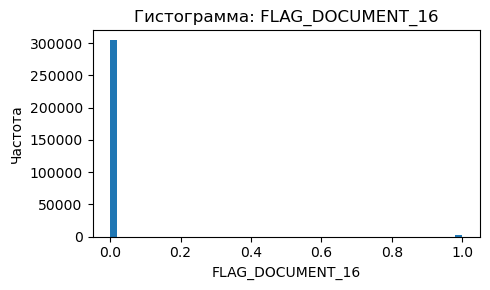

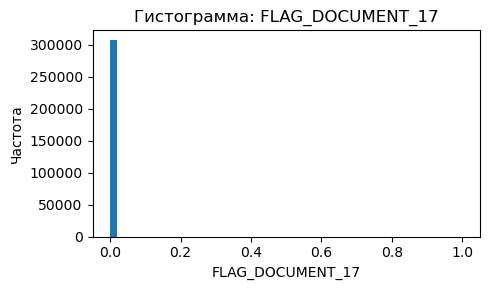

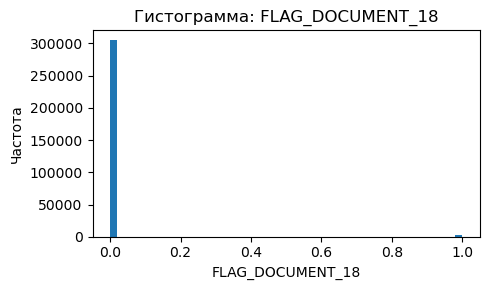

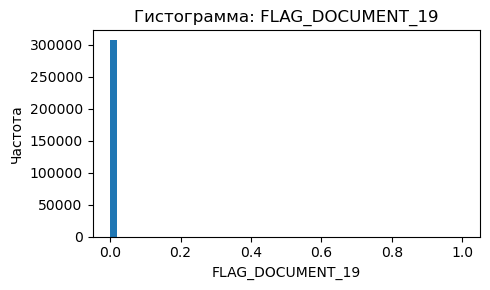

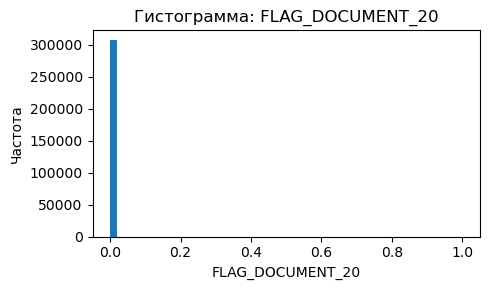

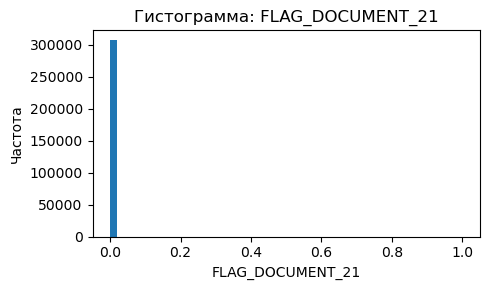

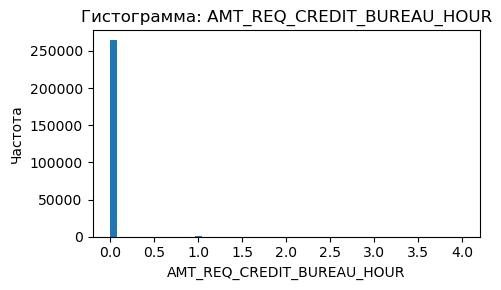

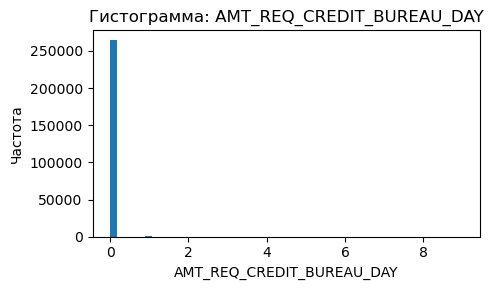

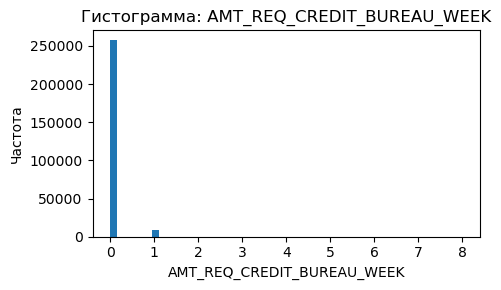

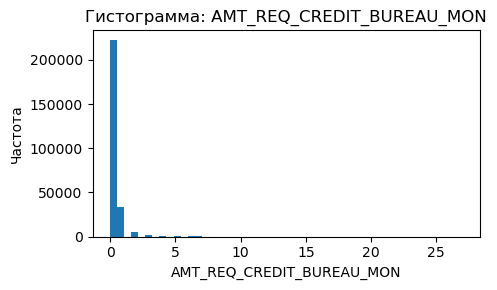

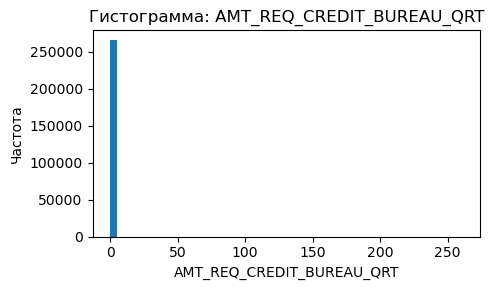

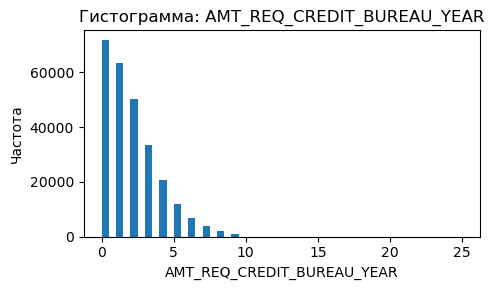

{'DAYS_EMPLOYED_eq_365243': 55374,
 'DAYS_BIRTH_min': -25229.0,
 'DAYS_BIRTH_max': -7489.0,
 'DAYS_REGISTRATION_min': -24672.0,
 'DAYS_REGISTRATION_max': 0.0,
 'DAYS_ID_PUBLISH_min': -7197.0,
 'DAYS_ID_PUBLISH_max': 0.0,
 'AMT_INCOME_TOTAL_num_neg': 0,
 'AMT_INCOME_TOTAL_num_zero': 0,
 'AMT_CREDIT_num_neg': 0,
 'AMT_CREDIT_num_zero': 0,
 'AMT_ANNUITY_num_neg': 0,
 'AMT_ANNUITY_num_zero': 0,
 'AMT_GOODS_PRICE_num_neg': 0,
 'AMT_GOODS_PRICE_num_zero': 0}

In [41]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Числовых колонок: {len(num_cols)}")

for col in num_cols:
    fig = plt.figure(figsize=(5, 3))
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f'Гистограмма: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

anomalies = {}
if 'DAYS_EMPLOYED' in df.columns:
    anomalies['DAYS_EMPLOYED_eq_365243'] = int((df['DAYS_EMPLOYED'] == 365243).sum())

for c in ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']:
    if c in df.columns:
        anomalies[f'{c}_min'] = float(df[c].min())
        anomalies[f'{c}_max'] = float(df[c].max())

for c in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
    if c in df.columns:
        anomalies[f'{c}_num_neg'] = int((df[c] < 0).sum())
        anomalies[f'{c}_num_zero'] = int((df[c] == 0).sum())

anomalies


## 4. Обработка пропусков и аномалий в числовых столбцах

In [57]:

from scipy.stats import skew
df_clean = df.copy()
df_clean = df_clean[df_clean.AMT_INCOME_TOTAL < 5e6]

if 'DAYS_EMPLOYED' in df_clean.columns:
    anomal_mask = df_clean['DAYS_EMPLOYED'] == 365243
    if anomal_mask.any():
        df_clean.loc[anomal_mask, 'DAYS_EMPLOYED'] = np.nan

for col in df_clean.select_dtypes(include=[np.number]).columns:
    series = df_clean[col]
    if series.isna().any():
        try:
            sk = skew(series.dropna())
        except Exception:
            sk = 0.0
        if np.abs(sk) < 1.0:
            fill_value = series.mean()
        else:
            mode_vals = series.mode(dropna=True)
            fill_value = mode_vals.iloc[0] if not mode_vals.empty else series.median()
        df_clean[col] = series.fillna(fill_value)

print("Готово. Кол-во пропусков после заполнения (топ-10):")
df_clean.isna().sum().sort_values(ascending=False).head(10)


Готово. Кол-во пропусков после заполнения (топ-10):


OCCUPATION_TYPE    96389
NAME_TYPE_SUITE     1292
SK_ID_CURR             0
FLAG_DOCUMENT_8        0
FLAG_DOCUMENT_7        0
FLAG_DOCUMENT_6        0
FLAG_DOCUMENT_5        0
FLAG_DOCUMENT_4        0
FLAG_DOCUMENT_3        0
FLAG_DOCUMENT_2        0
dtype: int64

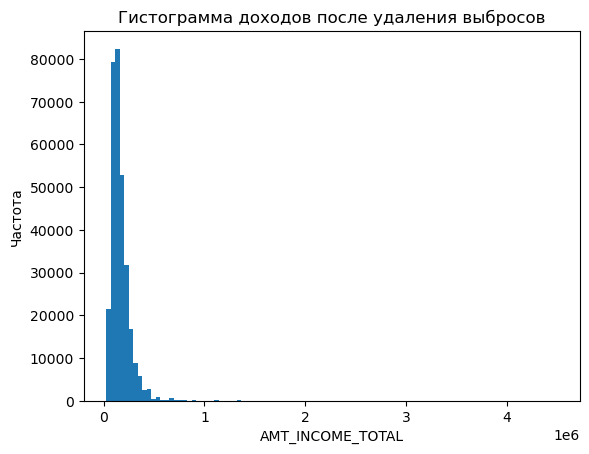

In [58]:

plt.hist(df_clean['AMT_INCOME_TOTAL'], bins=100)
plt.title('Гистограмма доходов после удаления выбросов')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Частота')
plt.show()

In [59]:
df_clean['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307506, dtype: float64

## 5. Обзор категориальных столбцов (object): уникальные значения и их количество

In [60]:

obj_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальных колонок: {len(obj_cols)}")
summary_obj = []
for col in obj_cols:
    uniq = df_clean[col].dropna().unique()
    summary_obj.append({'column': col, 'n_unique': len(uniq), 'sample_values': ', '.join(map(str, uniq[:10]))})
summary_obj_df = pd.DataFrame(summary_obj).sort_values('n_unique', ascending=False)
display(summary_obj_df)


Категориальных колонок: 12


,column,n_unique,sample_values
11,ORGANIZATION_TYPE,58,"Business Entity Type 3, School, Government, Re..."
9,OCCUPATION_TYPE,18,"Laborers, Core staff, Accountants, Managers, D..."
5,NAME_INCOME_TYPE,8,"Working, State servant, Commercial associate, ..."
4,NAME_TYPE_SUITE,7,"Unaccompanied, Family, Spouse, partner, Childr..."
10,WEEKDAY_APPR_PROCESS_START,7,"WEDNESDAY, MONDAY, THURSDAY, SUNDAY, SATURDAY,..."
7,NAME_FAMILY_STATUS,6,"Single / not married, Married, Civil marriage,..."
8,NAME_HOUSING_TYPE,6,"House / apartment, Rented apartment, With pare..."
6,NAME_EDUCATION_TYPE,5,"Secondary / secondary special, Higher educatio..."
1,CODE_GENDER,3,"M, F, XNA"
0,NAME_CONTRACT_TYPE,2,"Cash loans, Revolving loans"


## 6. Связь пропусков в OCCUPATION_TYPE с аномалией и их исправление

In [61]:

df_occ = df_clean.copy()
note = "Нет изменений — колонка OCCUPATION_TYPE отсутствует."
if 'OCCUPATION_TYPE' in df.columns:
    if 'DAYS_EMPLOYED' in df.columns:
        link_info = {
            'num_occ_missing': int(df['OCCUPATION_TYPE'].isna().sum()),
            'num_days_employed_365243': int((df['DAYS_EMPLOYED'] == 365243).sum()),
            'both_true': int((df['OCCUPATION_TYPE'].isna() & (df['DAYS_EMPLOYED'] == 365243)).sum())
        }
        display(link_info)
        cond = df['OCCUPATION_TYPE'].isna() & (df['DAYS_EMPLOYED'] == 365243)
        df_occ.loc[cond, 'OCCUPATION_TYPE'] = 'Unemployed'
        note = f"Присвоен ярлык 'Unemployed' для {cond.sum()} записей."
    else:
        mode_vals = df['OCCUPATION_TYPE'].mode(dropna=True)
        if not mode_vals.empty:
            df_occ['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(mode_vals.iloc[0])
            note = "Пропуски OCCUPATION_TYPE заполнены модой."
else:
    df_occ = df_clean.copy()

print(note)


{'num_occ_missing': 96391,
 'num_days_employed_365243': 55374,
 'both_true': 55372}

Присвоен ярлык 'Unemployed' для 55372 записей.


## 7. Корреляционная матрица и диаграммы размаха

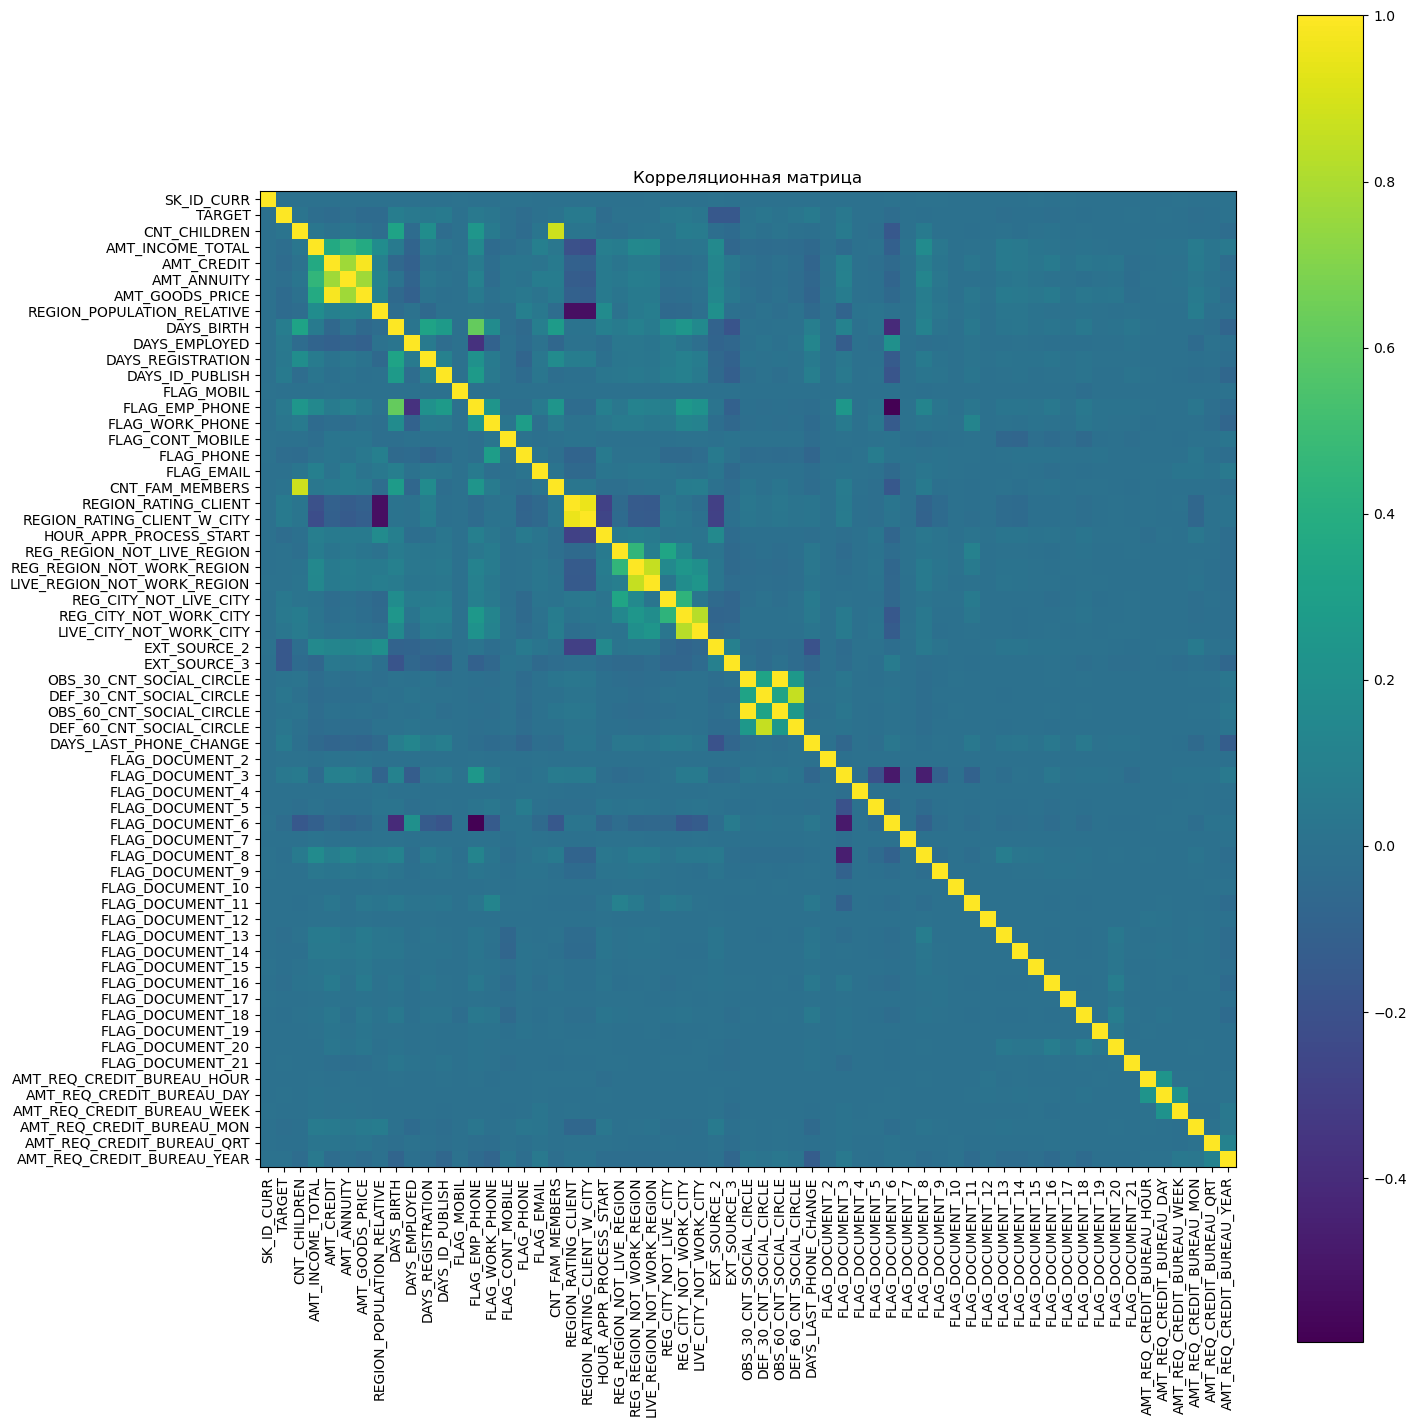

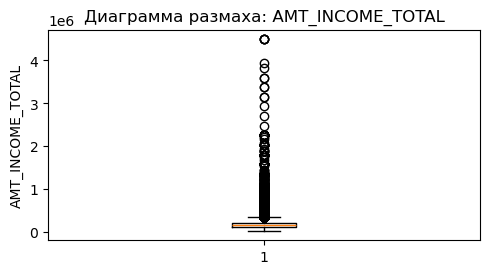

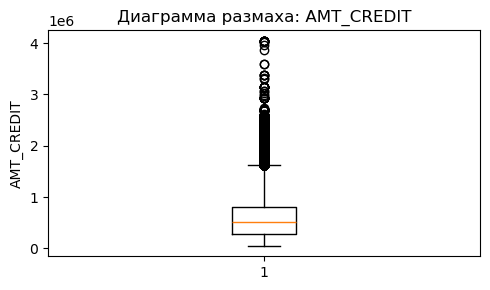

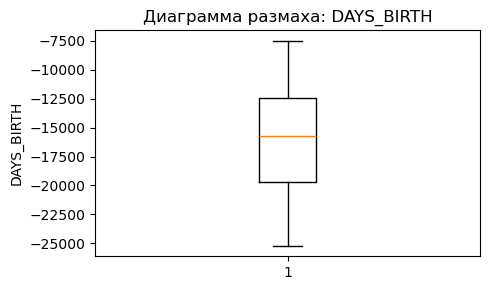

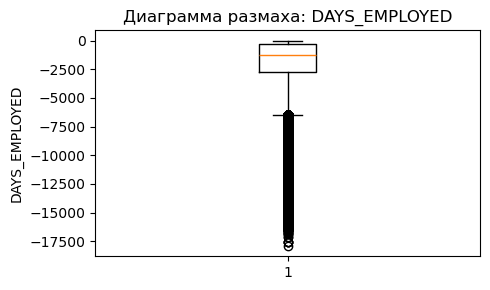

In [62]:

num_cols_after = df_occ.select_dtypes(include=[np.number]).columns.tolist()
corr = df_occ[num_cols_after].corr()

fig = plt.figure(figsize=(15, 15))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(num_cols_after)), num_cols_after, rotation=90)
plt.yticks(range(len(num_cols_after)), num_cols_after)
plt.colorbar()
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

for col in ['AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_BIRTH','DAYS_EMPLOYED']:
    if col in df_occ.columns:
        fig = plt.figure(figsize=(5, 3))
        plt.boxplot(df_occ[col].dropna(), vert=True)
        plt.title(f'Диаграмма размаха: {col}')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


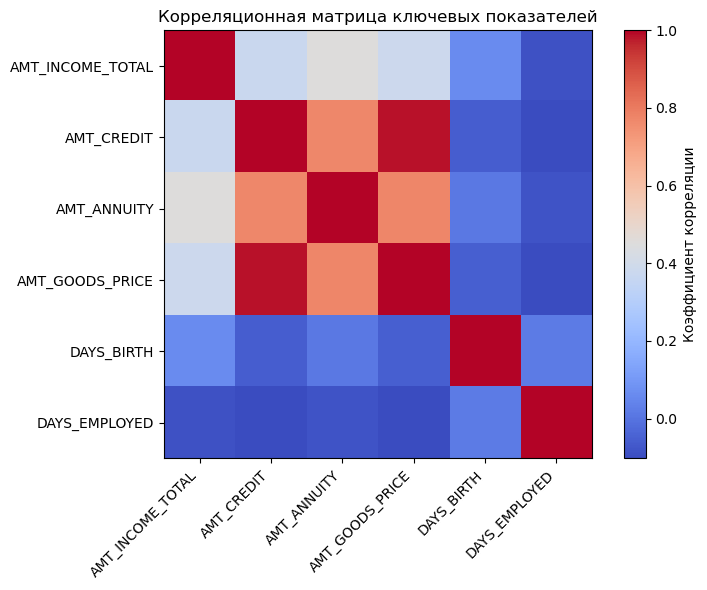

In [63]:
# --- Корреляционная матрица только для ключевых показателей ---
key_cols = [
    'AMT_INCOME_TOTAL',  # общий доход клиента
    'AMT_CREDIT',        # сумма кредита
    'AMT_ANNUITY',       # аннуитетный платёж
    'AMT_GOODS_PRICE',   # стоимость товаров
    'DAYS_BIRTH',        # возраст (в днях, отрицательный)
    'DAYS_EMPLOYED'      # стаж (в днях)
]

# Проверяем, какие из них реально есть в данных
key_cols = [c for c in key_cols if c in df_occ.columns]

corr = df_occ[key_cols].corr()

# Визуализация
plt.figure(figsize=(8, 6))
plt.imshow(corr, interpolation='nearest', cmap='coolwarm')
plt.xticks(range(len(key_cols)), key_cols, rotation=45, ha='right')
plt.yticks(range(len(key_cols)), key_cols)
plt.colorbar(label='Коэффициент корреляции')
plt.title('Корреляционная матрица ключевых показателей', fontsize=12)
plt.tight_layout()
plt.show()


## 8. Двумерный анализ трёх пар признаков

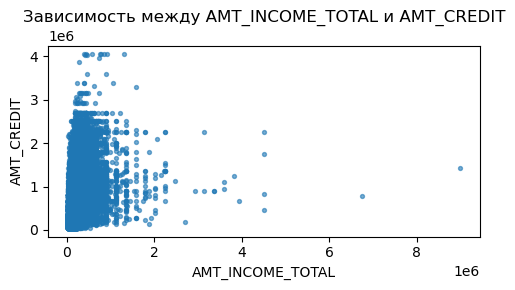

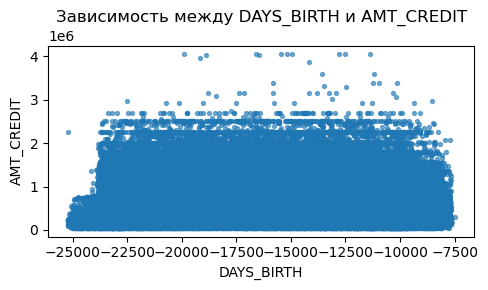

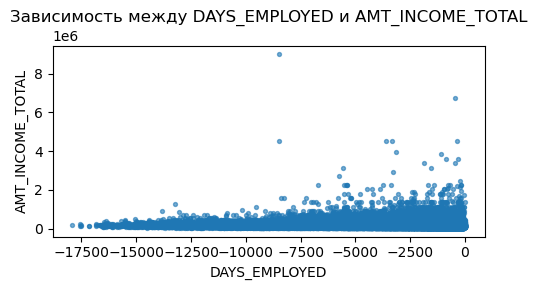

In [48]:

pairs = [
    ('AMT_INCOME_TOTAL', 'AMT_CREDIT'),
    ('DAYS_BIRTH', 'AMT_CREDIT'),
    ('DAYS_EMPLOYED', 'AMT_INCOME_TOTAL'),
]

for x, y in pairs:
    if x in df_occ.columns and y in df_occ.columns:
        fig = plt.figure(figsize=(5, 3))
        plt.scatter(df_occ[x], df_occ[y], s=8, alpha=0.6)
        plt.title(f'Зависимость между {x} и {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Пара пропущена: нет столбцов {x} и/или {y}")


## 9. Сохранение результатов и выводы

In [49]:

# out_path = Path('/mnt/data/application_data_clean.csv')
# df_occ.to_csv(out_path, index=False)
# print('Очищенный датасет сохранен в:', out_path)

print("""
Выводы:

1) Из набора данных удалены признаки с более чем 40% пропусков, что улучшило качество анализа.
2) Выявлена основная аномалия DAYS_EMPLOYED = 365243 — она заменена на NaN и отнесена к категории 'Unemployed'.
3) Пропуски в числовых признаках заполнены средним или модой в зависимости от формы распределения.
4) Категориальные признаки исследованы по числу уникальных значений; связь между OCCUPATION_TYPE и DAYS_EMPLOYED подтверждена.
5) Корреляционный анализ показал логичные взаимосвязи между доходами, кредитами и возрастом клиентов.
6) Диаграммы размаха выявили умеренные выбросы в доходах и кредитных суммах, характерные для финансовых данных.
7) Двумерный анализ подтвердил зависимость между уровнем дохода и суммой кредита, а также влияние возраста и стажа на финансовые показатели.

В целом проведённый разведочный анализ позволил очистить данные, устранить аномалии и выявить ключевые взаимосвязи между признаками.
""")




Выводы:

1) Из набора данных удалены признаки с более чем 40% пропусков, что улучшило качество анализа.
2) Выявлена основная аномалия DAYS_EMPLOYED = 365243 — она заменена на NaN и отнесена к категории 'Unemployed'.
3) Пропуски в числовых признаках заполнены средним или модой в зависимости от формы распределения.
4) Категориальные признаки исследованы по числу уникальных значений; связь между OCCUPATION_TYPE и DAYS_EMPLOYED подтверждена.
5) Корреляционный анализ показал логичные взаимосвязи между доходами, кредитами и возрастом клиентов.
6) Диаграммы размаха выявили умеренные выбросы в доходах и кредитных суммах, характерные для финансовых данных.
7) Двумерный анализ подтвердил зависимость между уровнем дохода и суммой кредита, а также влияние возраста и стажа на финансовые показатели.

В целом проведённый разведочный анализ позволил очистить данные, устранить аномалии и выявить ключевые взаимосвязи между признаками.

